In [1]:
import pandas as pd
import numpy as np
import statistics
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
df=pd.read_excel('C:\\Users\\eric.park\\Downloads\\vaccine_doses.xlsx')

In [3]:
dft=df[['report_date','previous_day_at_least_one','previous_day_fully_vaccinated','previous_day_3doses','previous_day_total_doses_administered']]

In [4]:
#Time Series

Text(0.5, 1.0, 'Vaccination Time Series')

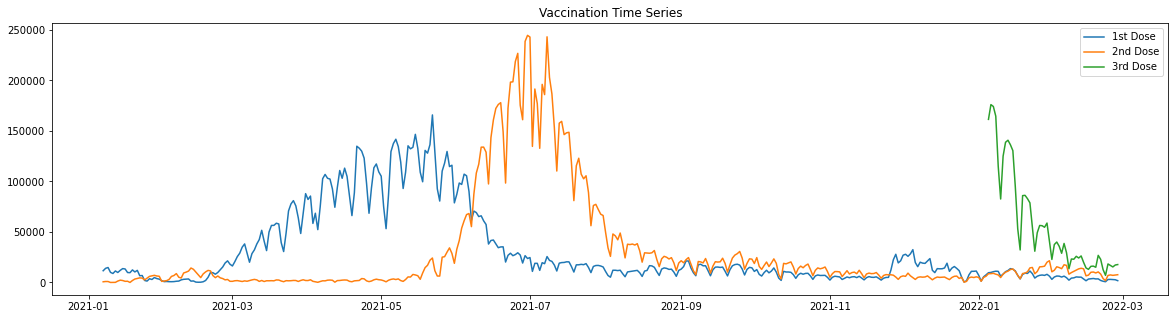

In [5]:
y_ax=dft['previous_day_at_least_one']
y_ax1=df['previous_day_fully_vaccinated']
y_ax2=df['previous_day_3doses']
x_ax=dft['report_date']

plt.figure(figsize=(20,5))
plt.plot(x_ax,y_ax,label='1st Dose')
plt.plot(x_ax,y_ax1,label='2nd Dose')
plt.plot(x_ax,y_ax2, label='3rd Dose')

plt.legend()
plt.title('Vaccination Time Series')

In [6]:
#ADF Test on each subset

In [7]:
#null hypothesis->data is not stationary

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
df1=dft[['report_date','previous_day_at_least_one']]
df1=df1.dropna()
#subset earliest 1st dose and 56 days from it
df1t=df1[(df1['report_date']>='2021-01-07')&(df1['report_date']<='2021-03-01')]

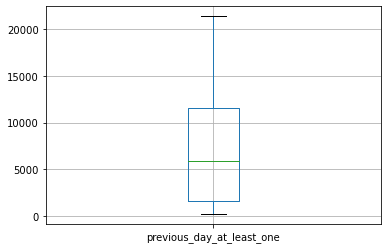

In [10]:
df1t.boxplot()

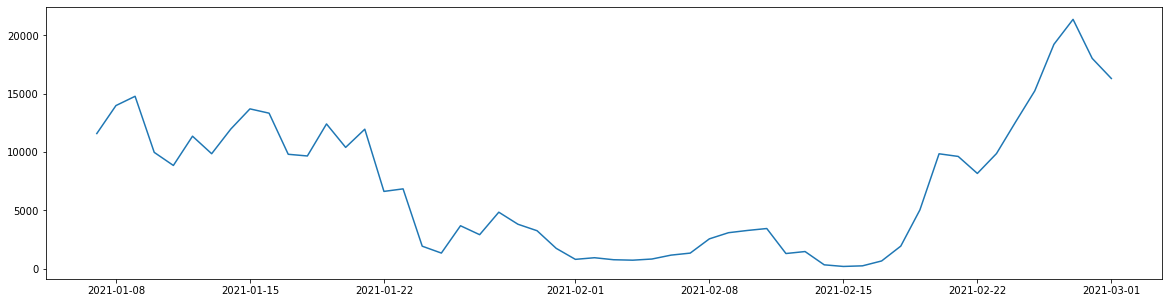

In [11]:
y_ax=df1t['previous_day_at_least_one']
x_ax=df1t['report_date']
plt.figure(figsize=(20,5))
plt.plot(x_ax,y_ax,label='1st Dose')

In [12]:
series=df1t[['previous_day_at_least_one']]
result=adfuller(series)
print(f'Test Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -2.1214787952108525
n_lags: 0.23596603211061395
p-value: 0.23596603211061395
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675


In [13]:
#does not reject null hypothesis because pvalue is greater than 0.05 & Test Statistics is greater than Critical Values
#This dataset is not stationary.

In [14]:
df2=dft[['report_date','previous_day_fully_vaccinated']]
df2=df2.dropna()
#subset earliest 2nd dose and 53 days from it
df2t=df2[(df2['report_date']>='2021-01-07')&(df1['report_date']<='2021-03-01')]

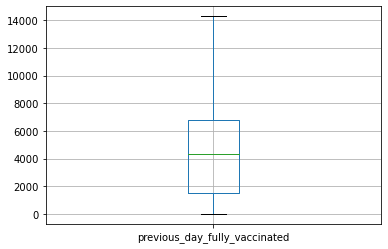

In [15]:
df2t.boxplot()

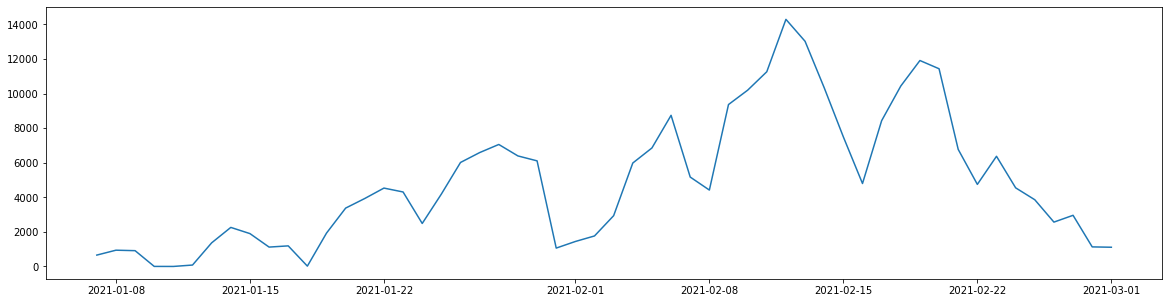

In [16]:
y_ax=df2t['previous_day_fully_vaccinated']
x_ax=df2t['report_date']
plt.figure(figsize=(20,5))
plt.plot(x_ax,y_ax,label='2nd Dose')

In [17]:
series1=df2t[['previous_day_fully_vaccinated']]
result1=adfuller(series1)
print(f'Test Statistic: {result1[0]}')
print(f'n_lags: {result1[1]}')
print(f'p-value: {result1[1]}')
for key, value in result1[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -2.368125779639069
n_lags: 0.15093546335964309
p-value: 0.15093546335964309
Critial Values:
   1%, -3.562878534649522
Critial Values:
   5%, -2.918973284023669
Critial Values:
   10%, -2.597393446745562


In [18]:
#does not reject null hypothesis because pvalue is greater than 0.05 & Test Statistics is greater than Critical Values
#This dataset is not stationary.

In [19]:
df3=dft[['report_date','previous_day_3doses']]
df3=df3.dropna()

In [20]:
series2=df3[['previous_day_3doses']]
result=adfuller(series2)
print(f'Test Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

Test Statistic: -4.196999303352296
n_lags: 0.0006666490840921225
p-value: 0.0006666490840921225
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675


In [21]:
#Rejects null hypothesis because pvalue is less than 0.05 & Test Statistics is less than Critical Values
#This dataset is stationary.

In [22]:
#Seaonality decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

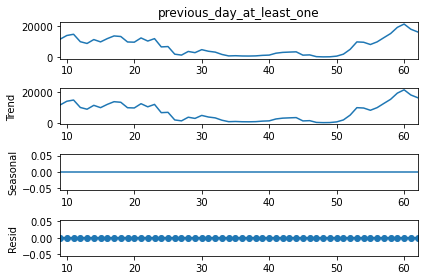

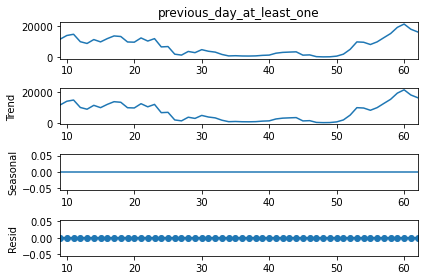

In [24]:
result = seasonal_decompose(df1t['previous_day_at_least_one'], model="additive", period=1)

trend = result.trend
seasonal = result.seasonal
residual = result.resid

result.plot()

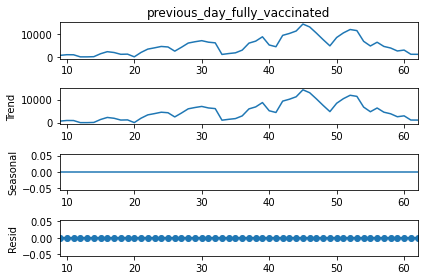

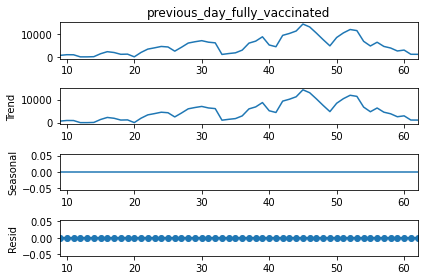

In [25]:
result1 = seasonal_decompose(df2t['previous_day_fully_vaccinated'], model="additive", period=1)

trend = result1.trend
seasonal = result1.seasonal
residual = result1.resid

result1.plot()

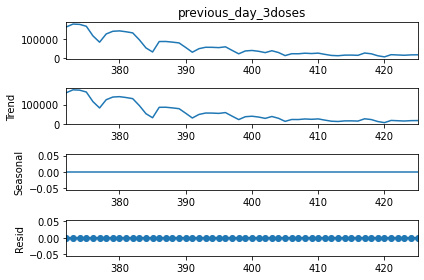

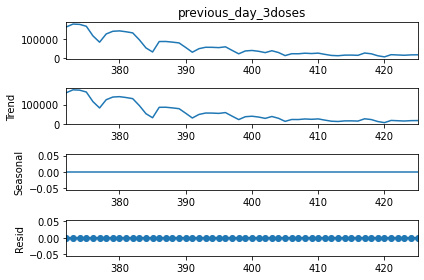

In [26]:
result2 = seasonal_decompose(df3['previous_day_3doses'], model="additive", period=1)

trend = result2.trend
seasonal = result2.seasonal
residual = result2.resid

result2.plot()

In [27]:
#Logarithmic Transformation

In [28]:
df1t_t=np.log(df1t['previous_day_at_least_one'])
df1_t=pd.DataFrame(data=df1t_t)
df1_t['previous_day_at_least_one_log']=df1_t['previous_day_at_least_one']
df1_t=df1_t[['previous_day_at_least_one_log']]
df_1_dose=pd.concat([df1_t,df1t],axis=1)
df_1_dose=df_1_dose[['report_date','previous_day_at_least_one_log']]

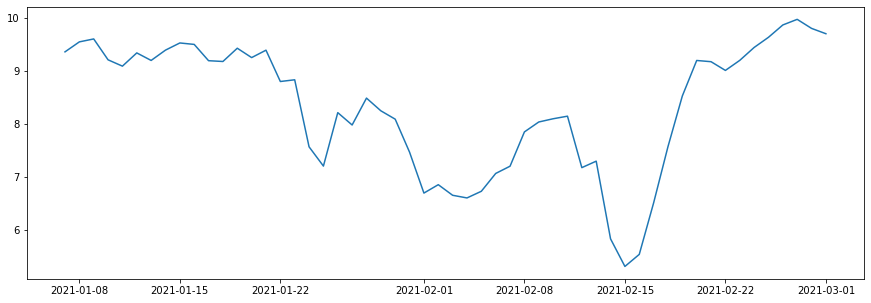

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df_1_dose['report_date'],df_1_dose['previous_day_at_least_one_log'])

In [30]:
np.seterr(divide='ignore')
df2t['previous_day_fully_vaccinated']=df2t['previous_day_fully_vaccinated'].replace(0,0.01)

df2t_t=np.log(df2t['previous_day_fully_vaccinated'])
df2_t=pd.DataFrame(data=df2t_t)
df2_t['previous_day_fully_vaccinated_log']=df2_t['previous_day_fully_vaccinated']
df2_t=df2_t[['previous_day_fully_vaccinated_log']]
df_2_dose=pd.concat([df2_t,df2t],axis=1)
df_2_dose=df_2_dose[['report_date','previous_day_fully_vaccinated_log']]
df_2_dose['previous_day_fully_vaccinated_log'][df_2_dose['previous_day_fully_vaccinated_log']<0]=0

<ipython-input-30-98a15cc7eb4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2t['previous_day_fully_vaccinated']=df2t['previous_day_fully_vaccinated'].replace(0,0.01)


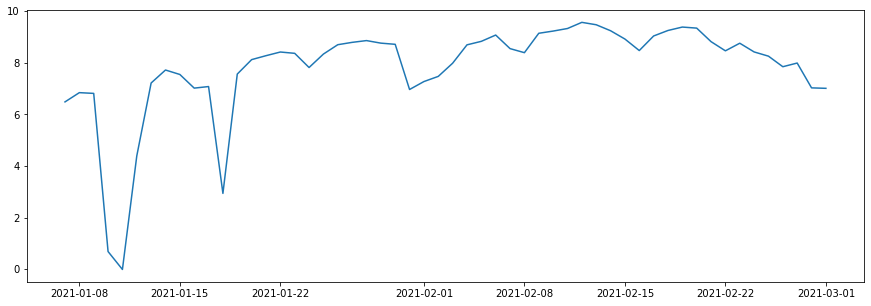

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df_2_dose['report_date'],df_2_dose['previous_day_fully_vaccinated_log'])

In [32]:
df3t_t=np.log(df3['previous_day_3doses'])
df3_t=pd.DataFrame(data=df3t_t)
df3_t['previous_day_3doses_log']=df3_t['previous_day_3doses']
df3_t=df3_t[['previous_day_3doses_log']]
df_3_dose=pd.concat([df3_t,df3],axis=1)
df_3_dose=df_3_dose[['report_date','previous_day_3doses_log']]

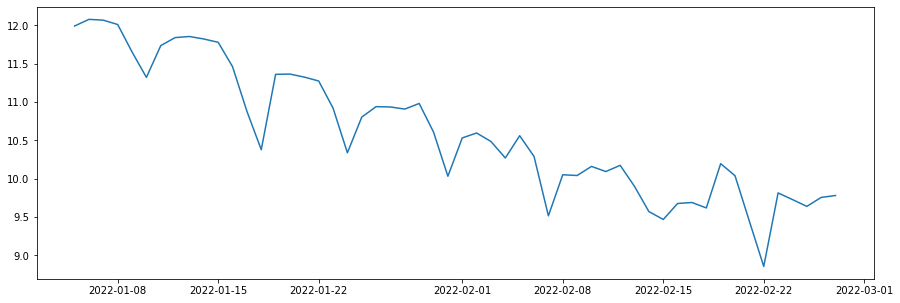

In [33]:
plt.figure(figsize=(15,5))
plt.plot(df_3_dose['report_date'],df_3_dose['previous_day_3doses_log'])

In [34]:
series5=df_1_dose[['previous_day_at_least_one_log']]
result5=adfuller(series5)
print(f'Test Statistic: {result5[0]}')
print(f'n_lags: {result5[1]}')
print(f'p-value: {result5[1]}')
for key, value in result5[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -2.5169071885196086
n_lags: 0.11141462978447453
p-value: 0.11141462978447453
Critial Values:
   1%, -3.5656240522121956
Critial Values:
   5%, -2.920142229157715
Critial Values:
   10%, -2.598014675124952


In [35]:
#still Non Stationary. Most likely because the sample size is too small

In [36]:
series6=df_2_dose[['previous_day_fully_vaccinated_log']]
result6=adfuller(series6)
print(f'Test Statistic: {result6[0]}')
print(f'n_lags: {result6[1]}')
print(f'p-value: {result6[1]}')
for key, value in result6[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -1.6116171554962435
n_lags: 0.47712674610728933
p-value: 0.47712674610728933
Critial Values:
   1%, -3.584828853223594
Critial Values:
   5%, -2.9282991495198907
Critial Values:
   10%, -2.6023438271604937


In [37]:
#still Non Stationary. Most likely because the sample size is too small

In [38]:
#Differencing 

In [39]:
df1t['1st_dose_differencing']=df1t['previous_day_at_least_one']-df1t['previous_day_at_least_one'].shift(1)

<ipython-input-39-c4ed2955dca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1t['1st_dose_differencing']=df1t['previous_day_at_least_one']-df1t['previous_day_at_least_one'].shift(1)


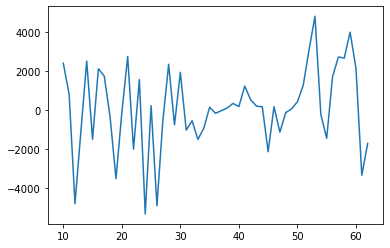

In [40]:
df1t['1st_dose_differencing'].plot()

In [41]:
series1=df1t[['1st_dose_differencing']]
result1=adfuller(series1.dropna())
print(f'Test Statistic: {result1[0]}')
print(f'n_lags: {result1[1]}')
print(f'p-value: {result1[1]}')
for key, value in result1[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

Test Statistic: -6.414842214971217
n_lags: 1.852205812488052e-08
p-value: 1.852205812488052e-08
Critial Values:
   1%, -3.562878534649522
Critial Values:
   5%, -2.918973284023669
Critial Values:
   10%, -2.597393446745562


In [42]:
#P-Value is less than 0.05, it rejects the null hypthesis. We can can conclude that data is stationary

In [43]:
df2t['2nd_dose_differencing']=df2t['previous_day_fully_vaccinated']-df2t['previous_day_fully_vaccinated'].shift(1)

<ipython-input-43-550471bcad15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2t['2nd_dose_differencing']=df2t['previous_day_fully_vaccinated']-df2t['previous_day_fully_vaccinated'].shift(1)


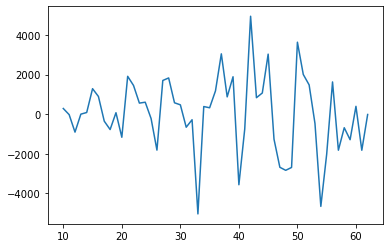

In [44]:
df2t['2nd_dose_differencing'].plot()

In [45]:
series4=df2t[['2nd_dose_differencing']]
result4=adfuller(series4.dropna())
print(f'Test Statistic: {result4[0]}')
print(f'n_lags: {result4[1]}')
print(f'p-value: {result4[1]}')
for key, value in result4[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

Test Statistic: -5.612074421073215
n_lags: 1.1971796068590797e-06
p-value: 1.1971796068590797e-06
Critial Values:
   1%, -3.5714715250448363
Critial Values:
   5%, -2.922629480573571
Critial Values:
   10%, -2.5993358475635153


In [46]:
#P-Value is less than 0.05, it rejects the null hypthesis. We can can conclude that data is stationary

In [47]:
#Forecast - ARIMA

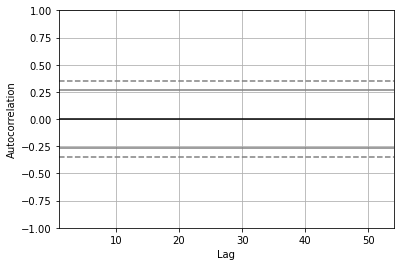

Wall time: 1.01 s


In [48]:
%%time
#autocorrecation for 1st Dose
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1t['1st_dose_differencing'])
plt.show()

Wall time: 1.34 s


<Figure size 864x576 with 0 Axes>

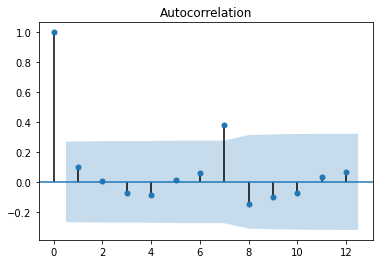

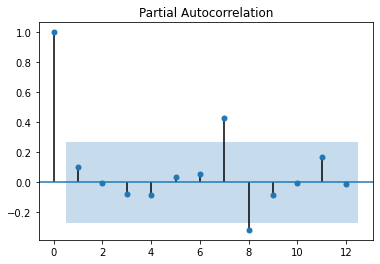

In [49]:
%%time
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.tsa.plot_acf(df1t['1st_dose_differencing'].dropna(),lags=12)
fig = sm.graphics.tsa.plot_pacf(df1t['1st_dose_differencing'].dropna(),lags=12)

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
%%time
model1=ARIMA(df1t['1st_dose_differencing'].dropna(),order=(6,0,3))

Wall time: 55 ms


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [52]:
%%time
model_fit1=model1.fit()

Wall time: 12 s


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [53]:
%%time
model_fit1.summary()

Wall time: 1.01 s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     1st_dose_differencing   No. Observations:                   53
Model:                        ARMA(6, 3)   Log Likelihood                -476.109
Method:                          css-mle   S.D. of innovations           1815.845
Date:                   Mon, 28 Mar 2022   AIC                            974.218
Time:                           23:31:31   BIC                            995.891
Sample:                                0   HQIC                           982.553
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          95.4196    294.793      0.324      0.746    -482.365     673.204
ar.L1.1st_dose_differencing     0.0811      0.149      0.545      0.586      -0.211       0.373
ar.L2.1st_dose_differencing     0.0476      0.147      0.324      0.746      -0.240       0.335
ar.L3.1st_dose_differencing    -0.8432      0.148     -5.704      0.000      -1.133      -0.553
ar.L4.1st_dose_differencing    -0.1264      0.151     -0.835      0.403      -0.423       0.170
ar.L5.1st_dose_differencing     0.1232      0.152      0.812      0.417      -0.174       0.420
ar.L6.1st_dose_differencing    -0.0027      0.150     -0.018      0.985      -0.297       0.292
ma.L1.1st_dose_differencing     0.0188      0.131      0.143      0.886      -0.238       0.276
ma.L2.1st_dose_differencing     0.0188      0.131      0.143      0.886      -0.238       0.275
ma.L3.1st_dose_differencing     1.0000      0.164      6.088      0.000       0.678       1.322
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5354           -0.8534j            1.0074           -0.1608
AR.2            0.5354           +0.8534j            1.0074            0.1608
AR.3           -1.3029           -0.0000j            1.3029           -0.5000
AR.4           -1.8907           -0.0000j            1.8907           -0.5000
AR.5            3.3379           -0.0000j            3.3379           -0.0000
AR.6           43.7504           -0.0000j           43.7504           -0.0000
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.4906           -0.8714j            1.0000           -0.1684
MA.3            0.4906           +0.8714j            1.0000            0.1684
-----------------------------------------------------------------------------
"""

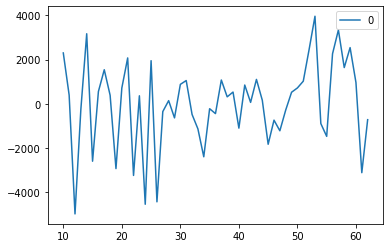

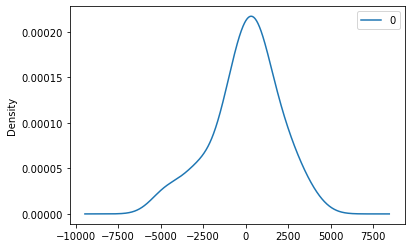

                 0
count    53.000000
mean    -17.970466
std    1969.401515
min   -4985.006700
25%    -894.567316
50%     316.206773
75%    1053.299822
max    3964.514126
Wall time: 1.16 s


In [54]:
%%time
residuals = pd.DataFrame(model_fit1.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Wall time: 38 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, '1st Dose ARIMA Model')

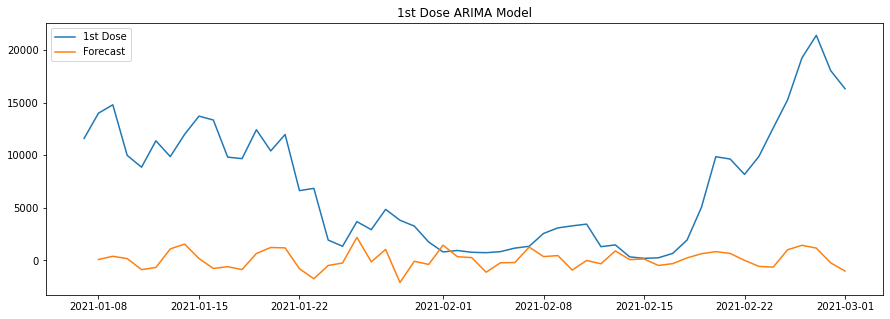

In [55]:
%%time
df1t['forecast']=model_fit1.predict(dynamic=False)

y_ax1=df1t['forecast']
y_ax2=df1t['previous_day_at_least_one']
x_ax=df1t['report_date']

plt.figure(figsize=(15,5))
plt.plot(x_ax,y_ax2,label='1st Dose')
plt.plot(x_ax,y_ax1,label='Forecast')


plt.legend()
plt.title('1st Dose ARIMA Model')

In [56]:
df1t.head()

,report_date,previous_day_at_least_one,1st_dose_differencing,forecast
9,2021-01-07,11594.0,NaN,NaN
10,2021-01-08,13992.0,2398.0,95.419627
11,2021-01-09,14787.0,795.0,400.154574
12,2021-01-10,9981.0,-4806.0,179.006700
13,2021-01-11,8859.0,-1122.0,-865.853639


In [57]:
#autocorrecation for 2nd Dose

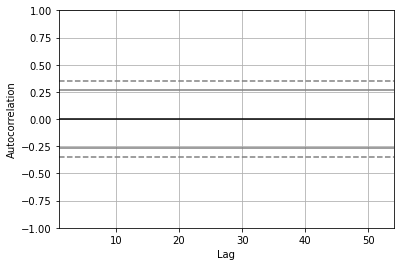

Wall time: 422 ms


In [58]:
%%time
autocorrelation_plot(df2t['2nd_dose_differencing'])
plt.show()

Wall time: 157 ms


<Figure size 864x576 with 0 Axes>

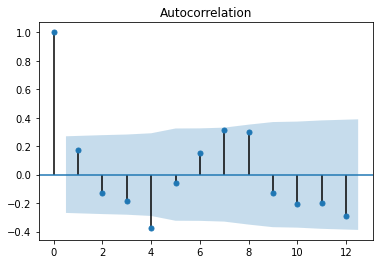

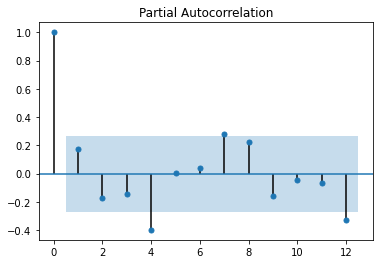

In [59]:
%%time
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.tsa.plot_acf(df2t['2nd_dose_differencing'].dropna(),lags=12)
fig = sm.graphics.tsa.plot_pacf(df2t['2nd_dose_differencing'].dropna(),lags=12)

In [60]:
%%time
model2=ARIMA(df2t['2nd_dose_differencing'].dropna(),order=(6,0,3))

Wall time: 3 ms


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [61]:
%%time
model_fit2=model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Wall time: 3.4 s


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [62]:
%%time
model_fit2.summary()

Wall time: 728 ms


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     2nd_dose_differencing   No. Observations:                   53
Model:                        ARMA(6, 3)   Log Likelihood                -477.530
Method:                          css-mle   S.D. of innovations                nan
Date:                   Mon, 28 Mar 2022   AIC                            977.060
Time:                           23:31:39   BIC                            998.733
Sample:                                0   HQIC                           985.394
                                                                                 
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           8.5813        nan        nan        nan         nan         nan
ar.L1.2nd_dose_differencing     0.7870   2.52e-05   3.12e+04      0.000       0.787       0.787
ar.L2.2nd_dose_differencing    -0.6070      2e-05  -3.03e+04      0.000      -0.607      -0.607
ar.L3.2nd_dose_differencing    -0.1715        nan        nan        nan         nan         nan
ar.L4.2nd_dose_differencing    -0.3638        nan        nan        nan         nan         nan
ar.L5.2nd_dose_differencing     0.1782        nan        nan        nan         nan         nan
ar.L6.2nd_dose_differencing    -0.1033        nan        nan        nan         nan         nan
ma.L1.2nd_dose_differencing    -0.7903      0.123     -6.406      0.000      -1.032      -0.549
ma.L2.2nd_dose_differencing     0.4844      0.154      3.140      0.002       0.182       0.787
ma.L3.2nd_dose_differencing     0.4245      0.124      3.411      0.001       0.181       0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6291           -0.7774j            1.0000           -0.1417
AR.2            0.6291           +0.7774j            1.0000            0.1417
AR.3           -0.9936           -1.0166j            1.4216           -0.3732
AR.4           -0.9936           +1.0166j            1.4216            0.3732
AR.5            1.2274           -1.8126j            2.1891           -0.1553
AR.6            1.2274           +1.8126j            2.1891            0.1553
MA.1            0.6074           -0.7944j            1.0000           -0.1461
MA.2            0.6074           +0.7944j            1.0000            0.1461
MA.3           -2.3560           -0.0000j            2.3560           -0.5000
-----------------------------------------------------------------------------
"""

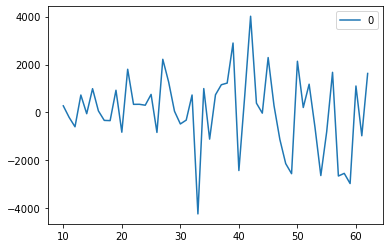

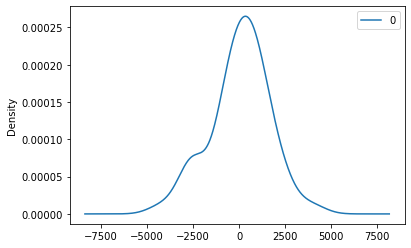

                 0
count    53.000000
mean     47.486541
std    1594.890941
min   -4240.439385
25%    -809.684795
50%     274.418741
75%     995.774248
max    4017.240343
Wall time: 1.04 s


In [63]:
%%time
residuals = pd.DataFrame(model_fit2.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Wall time: 70 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, '2nd Dose ARIMA Model')

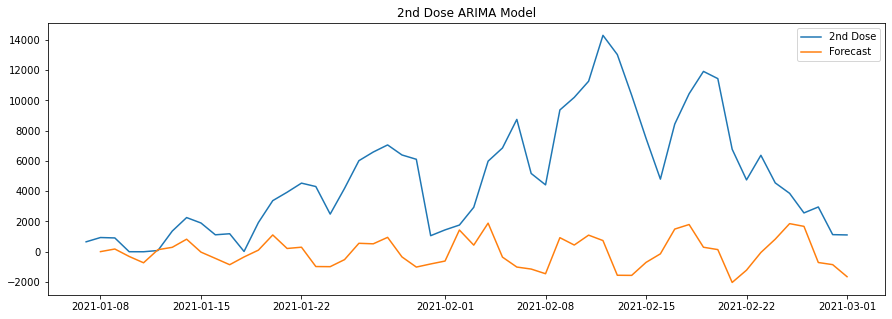

In [64]:
%%time
df2t['forecast']=model_fit2.predict(dynamic=False)

y_ax=df2t['previous_day_fully_vaccinated']
y_ax1=df2t['forecast']
x_ax=df2t['report_date']

plt.figure(figsize=(15,5))
plt.plot(x_ax,y_ax,label='2nd Dose')
plt.plot(x_ax,y_ax1,label='Forecast')


plt.legend()
plt.title('2nd Dose ARIMA Model')

In [65]:
#autocorrecation for 3rd Dose

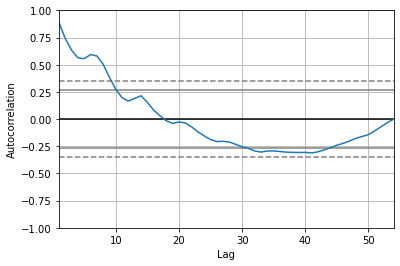

Wall time: 271 ms


In [66]:
%%time
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df3['previous_day_3doses'])
plt.show()

Wall time: 417 ms


<Figure size 864x576 with 0 Axes>

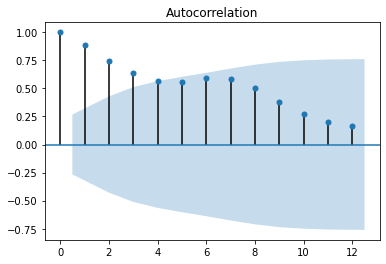

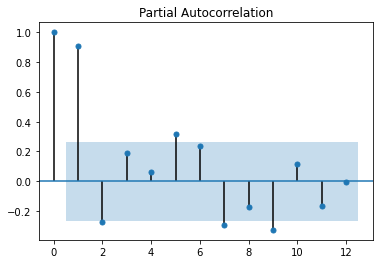

In [67]:
%%time
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.tsa.plot_acf(df3['previous_day_3doses'].dropna(),lags=12)
fig = sm.graphics.tsa.plot_pacf(df3['previous_day_3doses'].dropna(),lags=12)

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
%%time
model=ARIMA(df3['previous_day_3doses'],order=(6,0,4))

Wall time: 996 µs


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [70]:
%%time
model_fit=model.fit()

Wall time: 19.2 s


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [71]:
%%time
model_fit.summary()

Wall time: 976 ms


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     previous_day_3doses   No. Observations:                   54
Model:                      ARMA(6, 4)   Log Likelihood                -586.468
Method:                        css-mle   S.D. of innovations          10947.505
Date:                 Mon, 28 Mar 2022   AIC                           1196.935
Time:                         23:32:03   BIC                           1220.803
Sample:                              0   HQIC                          1206.140
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.705e+04   5.32e+04      1.073      0.283   -4.72e+04    1.61e+05
ar.L1.previous_day_3doses     2.2777      0.166     13.730      0.000       1.953       2.603
ar.L2.previous_day_3doses    -3.0119      0.320     -9.413      0.000      -3.639      -2.385
ar.L3.previous_day_3doses     3.1959      0.391      8.183      0.000       2.430       3.961
ar.L4.previous_day_3doses    -2.7326      0.379     -7.214      0.000      -3.475      -1.990
ar.L5.previous_day_3doses     1.6377      0.316      5.182      0.000       1.018       2.257
ar.L6.previous_day_3doses    -0.3784      0.176     -2.152      0.031      -0.723      -0.034
ma.L1.previous_day_3doses    -1.3551      0.140     -9.650      0.000      -1.630      -1.080
ma.L2.previous_day_3doses     1.4637      0.147      9.987      0.000       1.176       1.751
ma.L3.previous_day_3doses    -1.3551        nan        nan        nan         nan         nan
ma.L4.previous_day_3doses     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2065           -0.9832j            1.0047           -0.2829
AR.2           -0.2065           +0.9832j            1.0047            0.2829
AR.3            0.7085           -0.7848j            1.0573           -0.1331
AR.4            0.7085           +0.7848j            1.0573            0.1331
AR.5            1.0138           -0.0000j            1.0138           -0.0000
AR.6            2.3096           -0.0000j            2.3096           -0.0000
MA.1           -0.1601           -0.9871j            1.0000           -0.2756
MA.2           -0.1601           +0.9871j            1.0000            0.2756
MA.3            0.8376           -0.5462j            1.0000           -0.0920
MA.4            0.8376           +0.5462j            1.0000            0.0920
-----------------------------------------------------------------------------
"""

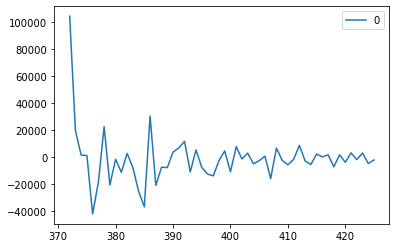

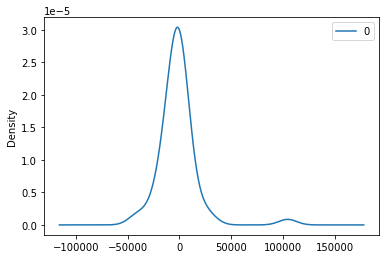

                   0
count      54.000000
mean    -1481.283324
std     19236.270070
min    -42418.240205
25%     -7925.983560
50%     -2218.467700
75%      2811.463253
max    104434.294887
Wall time: 1.21 s


In [72]:
%%time
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Wall time: 66 ms


Text(0.5, 1.0, '3rd Dose ARIMA Model')

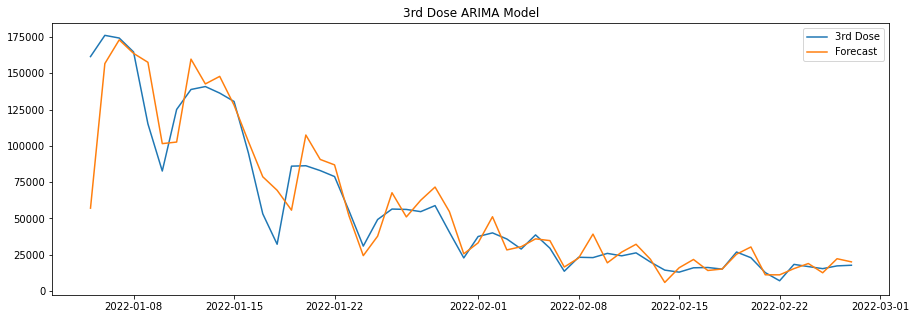

In [73]:
%%time

df3['forecast']=model_fit.predict(dynamic=False)

y_ax=df3['previous_day_3doses']
y_ax1=df3['forecast']
x_ax=df3['report_date']

plt.figure(figsize=(15,5))
plt.plot(x_ax,y_ax,label='3rd Dose')
plt.plot(x_ax,y_ax1,label='Forecast')


plt.legend()
plt.title('3rd Dose ARIMA Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Wall time: 127 ms


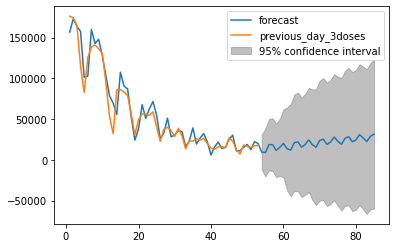

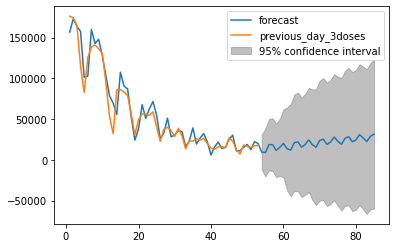

In [74]:
%%time
model_fit.plot_predict(start=1,end=85, alpha=0.05)

In [140]:
from sklearn import metrics
print("MAE:"+ str(metrics.mean_absolute_error(y_test,y_pred)))
print("MSE:"+ str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE:"+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

MAE:8268.740533668644
MSE:156854677.14960158
RMSE:12524.1637305491


In [75]:
#regression for 1st dose

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
%%time

x=df1t['report_date']
y=df1t['previous_day_at_least_one']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Wall time: 2 ms


In [78]:
%%time

#create dataframe from trained data
report_date=x_train
f_vax=y_train
zipped = list(zip(report_date,f_vax))

temp_df = pd.DataFrame(zipped, columns=['Report_Date', 'Vaccine'])
sorted_df = temp_df.sort_values(by='Report_Date')

Wall time: 3 ms


In [79]:
%%time
#add ordinal value for date
l=[]
for i in range(len(sorted_df['Report_Date'])):
    i+=1
    l.append(i)
sorted_df['Order']=l

Wall time: 2 ms


In [80]:
%%time
model=LinearRegression()

Wall time: 0 ns


In [81]:
%%time

xx=sorted_df['Order']
yy=sorted_df['Vaccine']

model.fit(xx.values.reshape(-1,1),yy)
a=model.coef_
print("slope:"+ str(a))
b=model.intercept_
print("intercept:"+str(b))
print("model score:"+str(model.score(xx.values.reshape(-1,1),yy)))

slope:[-101.85727833]
intercept:9584.207207207208
model score:0.03366457195865458
Wall time: 5 ms


Wall time: 41 ms


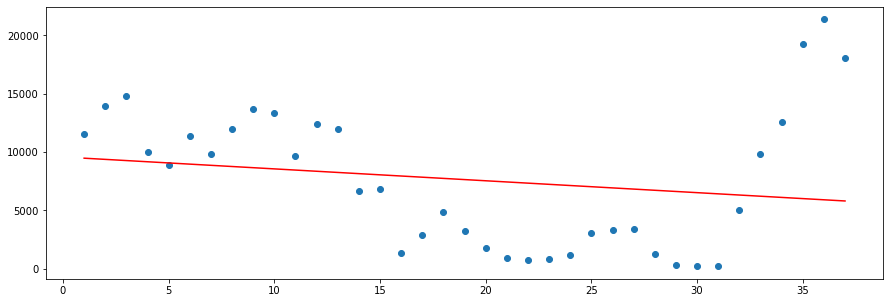

In [82]:
%%time

xx=sorted_df['Order']
yy=sorted_df['Vaccine']
plt.figure(figsize=(15,5))
plt.scatter(xx,yy)
a, b = np.polyfit(xx, yy, 1)
plt.plot(xx, a*xx+b, color='red')

In [83]:
%%time

#sorted test dataframe
report_date1=x_test
f_vax1=y_test
zipped = list(zip(report_date1,f_vax1))

temp_df1 = pd.DataFrame(zipped, columns=['Report_Date', 'Vaccine'])
sorted_df1 = temp_df.sort_values(by='Report_Date')

Wall time: 6 ms


In [84]:
%%time
#add ordinal value for date
l1=[]
for i in range(len(sorted_df1['Report_Date'])):
    i+=1
    l1.append(i)
sorted_df1['Order']=l1

Wall time: 2 ms


Wall time: 52 ms


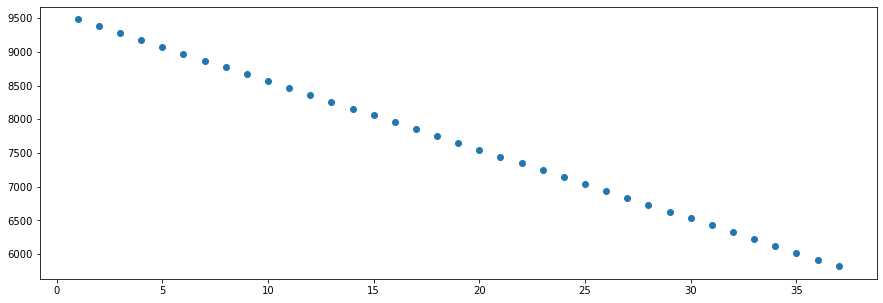

In [85]:
%%time

x_x=sorted_df1['Order']
y_y=sorted_df1['Vaccine']

predict=model.predict(x_x.values.reshape(-1,1))
plt.figure(figsize=(15,5))
plt.scatter(x_x,predict)

In [86]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [87]:
k = 3
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
 
result = cross_val_score(model, x_x.values.reshape(-1,1), y_y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: -31.23331466641194


In [92]:
from sklearn.metrics import mean_squared_error
MSE = np.square(np.subtract(y_y,predict)).mean()
print(MSE)

33950313.698332764


In [93]:
#regression on 2nd dose

In [94]:
%%time

x1=df2t['report_date']
y1=df2t['previous_day_fully_vaccinated']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

Wall time: 1.92 ms


In [95]:
%%time

#create dataframe from trained data
report_date=x_train1
f_vax=y_train1
zipped = list(zip(report_date,f_vax))

temp_df = pd.DataFrame(zipped, columns=['Report_Date', 'Vaccine'])
sorted_df2 = temp_df.sort_values(by='Report_Date')

Wall time: 3 ms


In [96]:
%%time

#add ordinal value for date
l=[]
for i in range(len(sorted_df2['Report_Date'])):
    i+=1
    l.append(i)
sorted_df2['Order']=l

Wall time: 1 ms


In [97]:
%%time

model=LinearRegression()
xx=sorted_df2['Order']
yy=sorted_df2['Vaccine']

model.fit(xx.values.reshape(-1,1),yy)
a=model.coef_
print("slope:"+ str(a))
b=model.intercept_
print("intercept:"+str(b))
print("model score:"+str(model.score(xx.values.reshape(-1,1),yy)))

slope:[195.53860835]
intercept:1171.9288738738755
model score:0.424132779257246
Wall time: 4 ms


Wall time: 34 ms


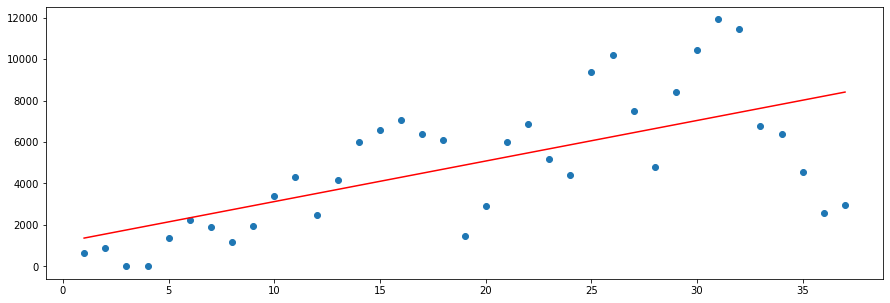

In [98]:
%%time

xx=sorted_df2['Order']
yy=sorted_df2['Vaccine']
plt.figure(figsize=(15,5))
plt.scatter(xx,yy)
a, b = np.polyfit(xx, yy, 1)
plt.plot(xx, a*xx+b, color='red')

In [99]:
%%time

#sorted test dataframe
report_date1=x_test1
f_vax1=y_test1
zipped = list(zip(report_date1,f_vax1))

temp_df1 = pd.DataFrame(zipped, columns=['Report_Date', 'Vaccine'])
sorted_df1 = temp_df.sort_values(by='Report_Date')

Wall time: 2 ms


In [100]:
%%time

#add ordinal value for date
l1=[]
for i in range(len(sorted_df1['Report_Date'])):
    i+=1
    l1.append(i)
sorted_df1['Order']=l1

Wall time: 2 ms


Wall time: 25 ms


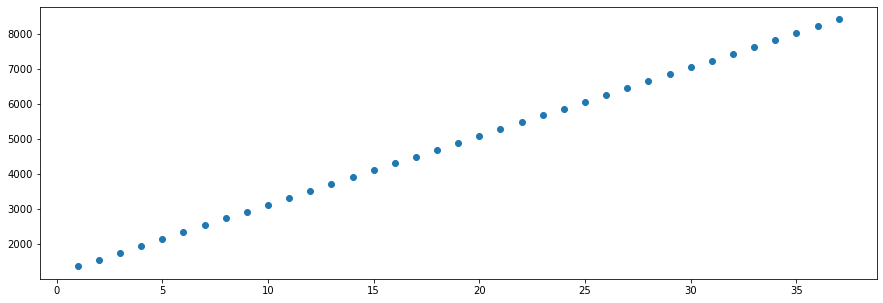

In [101]:
%%time

x_x=sorted_df2['Order']
y_y=sorted_df2['Vaccine']

predict=model.predict(x_x.values.reshape(-1,1))
plt.figure(figsize=(15,5))
plt.scatter(x_x,predict)

In [102]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [103]:
k = 3
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
 
result = cross_val_score(model, x_x.values.reshape(-1,1), y_y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: -2.952632806470035


In [104]:
from sklearn.metrics import mean_squared_error
MSE = np.square(np.subtract(y_y,predict)).mean()
print(MSE)

5918210.544500327


In [105]:
#regression on 3rd dose

In [106]:
%%time

x2=df3['report_date']
y2=df3['previous_day_3doses']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3)

Wall time: 2 ms


In [107]:
%%time

#create dataframe from trained data
report_date=x_train2
f_vax=y_train2
zipped = list(zip(report_date,f_vax))

temp_df = pd.DataFrame(zipped, columns=['Report_Date', 'Vaccine'])
sorted_df3 = temp_df.sort_values(by='Report_Date')

Wall time: 3 ms


In [108]:
%%time

#add ordinal value for date
l=[]
for i in range(len(sorted_df3['Report_Date'])):
    i+=1
    l.append(i)
sorted_df3['Order']=l

Wall time: 1 ms


In [109]:
%%time

model=LinearRegression()
xx=sorted_df3['Order']
yy=sorted_df3['Vaccine']

model.fit(xx.values.reshape(-1,1),yy)
a=model.coef_
print("slope:"+ str(a))
b=model.intercept_
print("intercept:"+str(b))
print("model score:"+str(model.score(xx.values.reshape(-1,1),yy)))

slope:[-4306.32906591]
intercept:144458.49549549547
model score:0.800142426663579
Wall time: 3 ms


Wall time: 51 ms


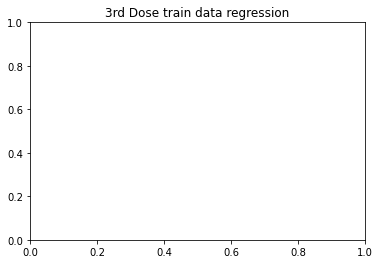

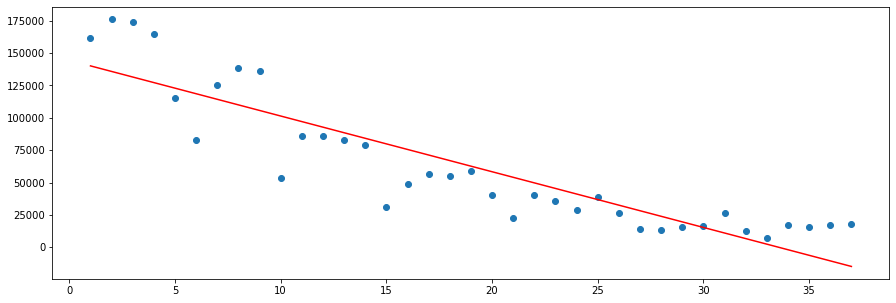

In [110]:
%%time

xx=sorted_df3['Order']
yy=sorted_df3['Vaccine']
plt.title('3rd Dose train data regression')
plt.figure(figsize=(15,5))
plt.scatter(xx,yy)
a, b = np.polyfit(xx, yy, 1)
plt.plot(xx, a*xx+b, color='red')

In [111]:
%%time

#sorted test dataframe
report_date1=x_test2
f_vax1=y_test2
zipped = list(zip(report_date1,f_vax1))

temp_df1 = pd.DataFrame(zipped, columns=['Report_Date', 'Vaccine'])
sorted_df1 = temp_df.sort_values(by='Report_Date')

Wall time: 6 ms


In [112]:
%%time

#add ordinal value for date
l1=[]
for i in range(len(sorted_df3['Report_Date'])):
    i+=1
    l1.append(i)
sorted_df1['Order']=l1

Wall time: 1 ms


Wall time: 44 ms


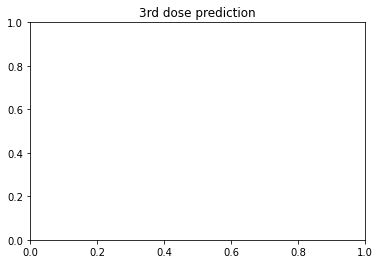

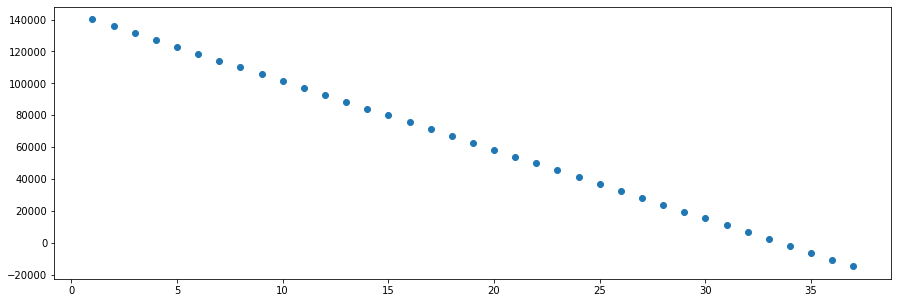

In [113]:
%%time

x_x=sorted_df1['Order']
y_y=sorted_df1['Vaccine']

predict=model.predict(x_x.values.reshape(-1,1))
plt.title('3rd dose prediction')
plt.figure(figsize=(15,5))
plt.scatter(x_x,predict)

In [114]:
#cross validation

In [115]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [116]:
k = 3
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
 
result = cross_val_score(model, x_x.values.reshape(-1,1), y_y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: -30.11483095572689


In [118]:
from sklearn.metrics import mean_squared_error
MSE = np.square(np.subtract(y_y,predict)).mean()
print(MSE)

528047010.86668456


In [119]:
#Gradient Boosting Regressor

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [121]:
%%time

x2=df3['report_date']
y2=df3['previous_day_3doses']

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3)

Wall time: 2 ms


In [122]:
%%time

from sklearn.preprocessing import StandardScaler
tx=x_train
xt=x_test
ty=y_train
sc = StandardScaler()

X_train_std = sc.fit_transform(tx.values.reshape(-1,1))
X_test_std = sc.transform(xt.values.reshape(-1,1))

Wall time: 1 ms


In [123]:
%%time

gbr_params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          }

Wall time: 0 ns


In [124]:
%%time
gbr = GradientBoostingRegressor(**gbr_params)

Wall time: 0 ns


In [125]:
%%time
gbr.fit(X_train_std, y_train)

Wall time: 59 ms


GradientBoostingRegressor()

In [126]:
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

Model Accuracy: 0.915


In [127]:
%%time
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 156854677.1496
Wall time: 1 ms


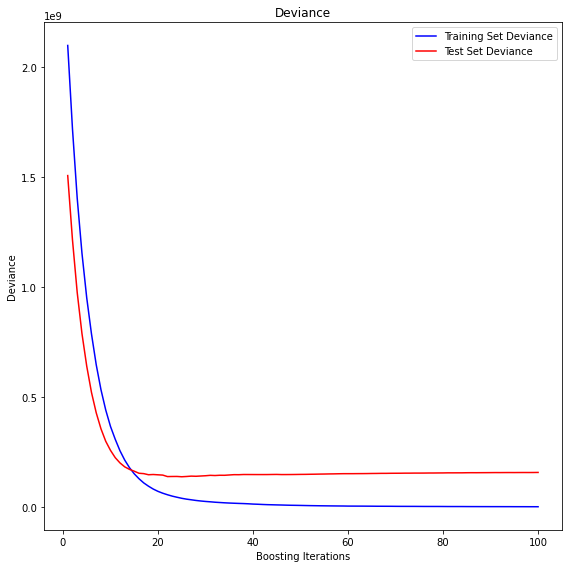

Wall time: 748 ms


In [128]:
%%time
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [129]:
#cross validation

In [130]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [131]:
k = 3
kf = KFold(n_splits=k, random_state=None)
model = gbr
 
result = cross_val_score(model , x_train.values.reshape(-1,1), y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.6880104485754818
